Task-1::
**Why we cannot use even number for block size in adaptive thresholding ?**


In adaptive thresholding, the block size determines the size of the neighborhood around each pixel used to calculate the local threshold. The block size must be an odd number because of the following reasons:

1. Symmetry for Center Pixel

An odd block size ensures that there is a well-defined center pixel in the block.

With an even block size, there is no single center pixel, which would make it ambiguous when assigning the threshold value for the pixel being processed.

2. Neighborhood Consistency

In adaptive thresholding, the algorithm adjusts the threshold for a pixel based on its surrounding neighborhood. If the block size is even, the neighborhood does not symmetrically surround the pixel, leading to inconsistencies in how thresholds are calculated.

3. Implementation Simplicity

Most implementations of adaptive thresholding  assume an odd block size because:

It simplifies the mathematical computation for defining the neighborhood.

It ensures consistent behavior across all pixels.




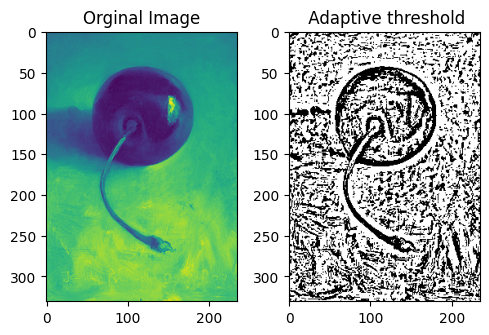

In [1]:
#Task-2:: Use adaptive thresholding method to separate the given berry image from background , remove unwanted background as better as possible.

# I am using given images and applying different adaptive thresholding parameter to separate berry from backgroud



import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image1 = cv2.imread("/content/berry-1.png", cv2.IMREAD_GRAYSCALE)

# Applying adaptive thresholding method
adap_mean = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)


# Displaying images in a 1x2 grid
plt.figure(figsize=(5,10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Orginal Image")

# Adaptive threshold Mean C
plt.subplot(1, 2, 2)
plt.imshow(adap_mean, cmap="gray")
plt.title(" Adaptive threshold")


plt.tight_layout()
plt.show()




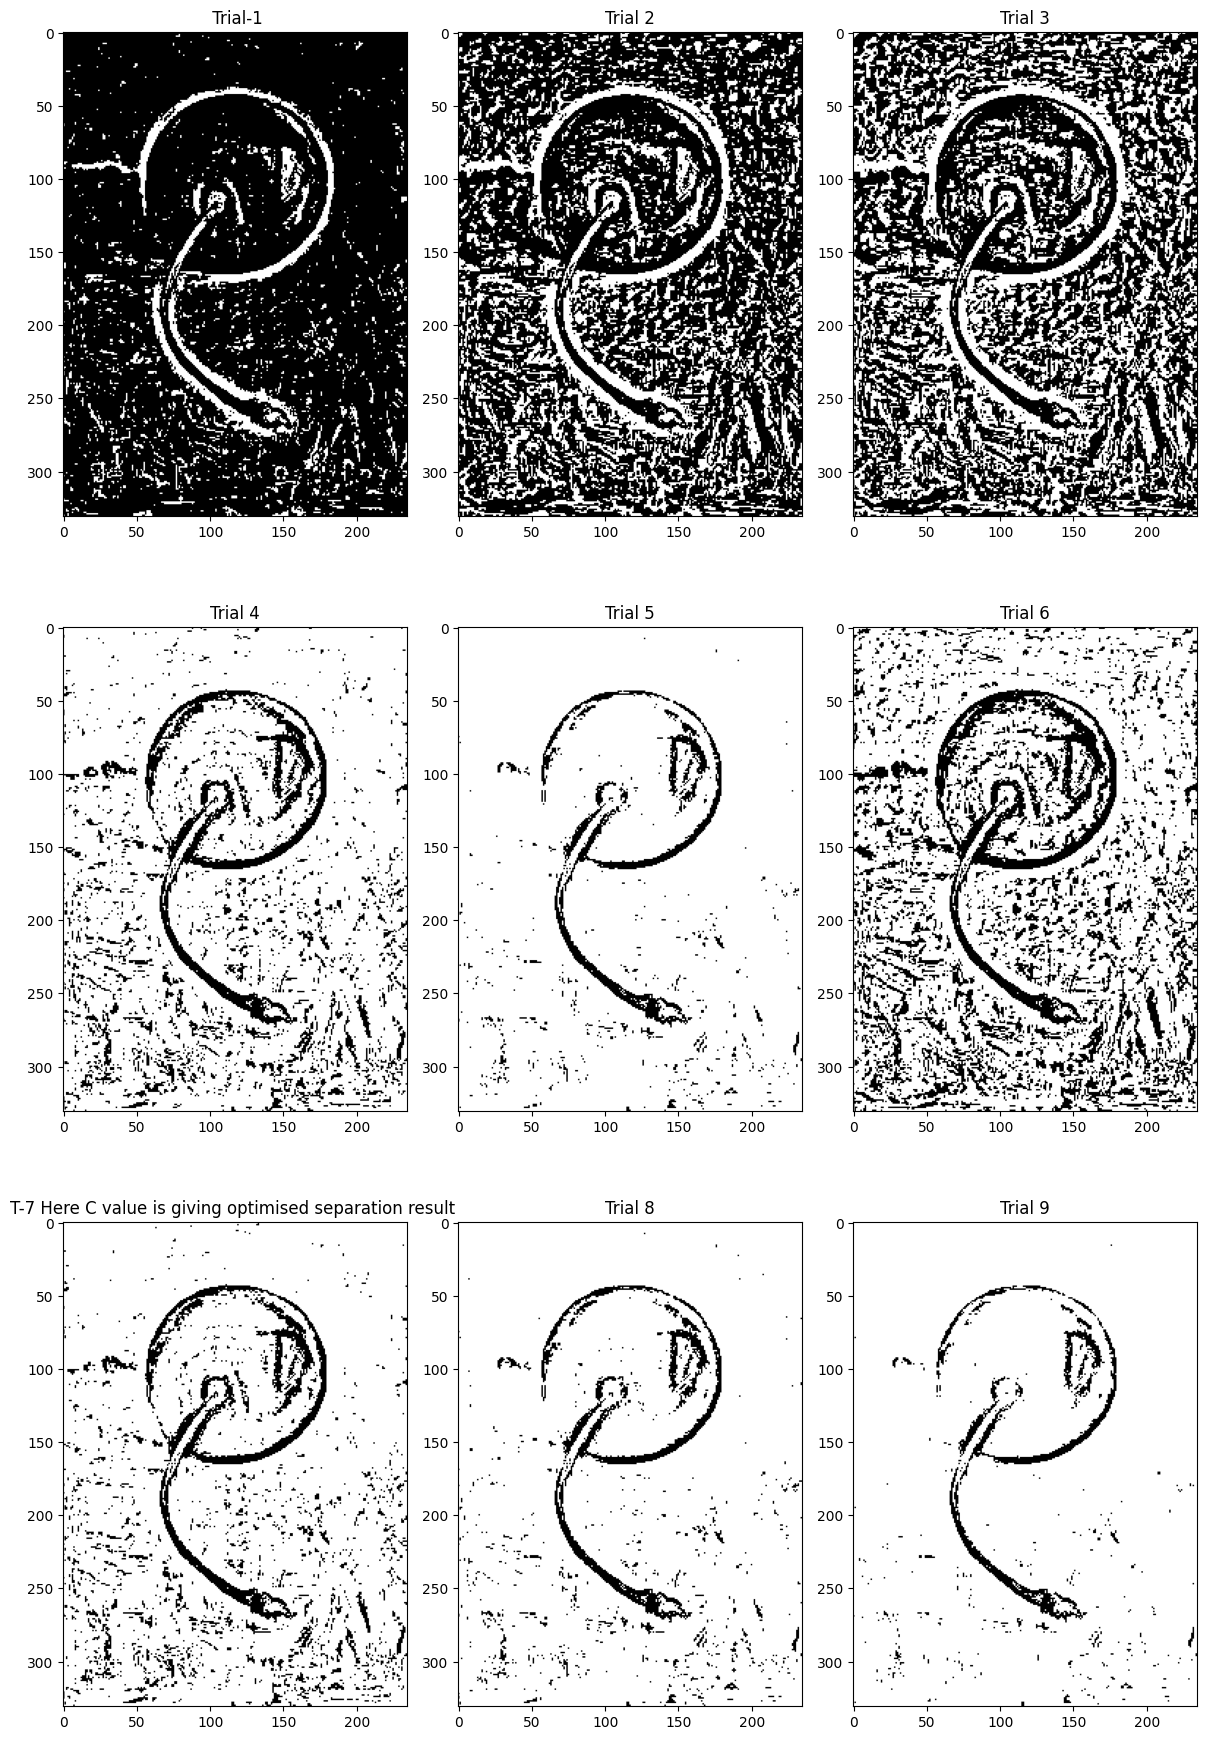

In [6]:
# now trying differen C Value to optimize image separation from background


adap_mean_trial2 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,-5)
adap_mean_trial3 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,-1)
adap_mean_trial4 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,0)
adap_mean_trial5 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,5)
adap_mean_trial6 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,10)

# Since we found that image seperation is optimised @ range between 0 to 10 .
# now we changing C value between 3 to 12  for optimizing image separation from background

adap_mean_trial7 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)

adap_mean_trial8 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,6)
          #( Here ^^^ C = 6  is giving optimised separation result)

adap_mean_trial9 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
adap_mean_trial10 = cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,12)


# Displaying images in a 3x3 grid
plt.figure(figsize=(12,18))

# Adaptive threshold Mean C
plt.subplot(3, 3, 1)
plt.imshow(adap_mean_trial2, cmap="gray")
plt.title(" Trial-1")


# Trial 2
plt.subplot(3, 3, 2)
plt.imshow(adap_mean_trial3, cmap="gray")
plt.title("Trial 2")


# Trial 3
plt.subplot(3, 3, 3)
plt.imshow(adap_mean_trial4, cmap="gray")
plt.title("Trial 3")

# Trial 4
plt.subplot(3, 3, 4)
plt.imshow(adap_mean_trial5, cmap="gray")
plt.title("Trial 4")

# Trial 5
plt.subplot(3, 3, 5)
plt.imshow(adap_mean_trial6, cmap="gray")
plt.title("Trial 5")

# Trial 6
plt.subplot(3, 3, 6)
plt.imshow(adap_mean_trial7, cmap="gray")
plt.title("Trial 6")

# Trial 7   ( Here C value is giving optimised separation result)
plt.subplot(3, 3, 7)
plt.imshow(adap_mean_trial8, cmap="gray")
plt.title("T-7 Here C value is giving optimised separation result ")


# Trial 8
plt.subplot(3, 3, 8)
plt.imshow(adap_mean_trial9, cmap="gray")
plt.title("Trial 8")

# Trial 9
plt.subplot(3, 3, 9)
plt.imshow(adap_mean_trial10, cmap="gray")
plt.title("Trial 9")


plt.tight_layout()
plt.show()



Task-3:: How can we determine the value of C in adaptive threshold Mean



C is a bias or offset value subtracted from the mean  to compute the threshold.

It adjusts the sensitivity of the thresholding process:

Positive C: Lowers the threshold value, causing more pixels to be classified as foreground (brighter regions).

Negative C: Increases the threshold value, causing more pixels to be classified as background (darker regions).


Below are the some way of determining the Value  of C :

1. Lighting Conditions:

Uneven illumination may require a higher or lower C to compensate for varying brightness.

2. Image Contrast:

High-contrast images may need smaller C values, while low-contrast images may benefit from larger values.

3. Foreground-Background Separation:

If the foreground and background are close in intensity, tweaking C can help differentiate them.

4. Noise:

Larger C values can suppress noise by making thresholding stricter.


The best way to determine the value of
𝐶 is through trial and error. This is because different images or different lighting conditions will require different values for C to produce satisfactory results.